# Survey Data Analysis: Multiple-Choice Responses, Clustering, and Insights

This notebook analyzes survey data from a JSON file, focusing on multiple-choice (MCQ) responses, clustering, and extracting actionable insights.

## 1. Import Required Libraries
We will use pandas, numpy, matplotlib, seaborn, scikit-learn, and scipy for data analysis, visualization, and clustering.

In [22]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import json
import warnings
warnings.filterwarnings('ignore')

## 2. Load Survey Data from JSON File
We will load the survey data from the JSON file (`survey-results.json`).

In [23]:
# Load the survey data from JSON file
with open('survey-results-f5ae24e1-9985-450b-b36c-878ffa7f471d.json', 'r', encoding='utf-8') as f:
    survey_data = json.load(f)

# Preview the structure of the JSON data
print('Keys in JSON:', survey_data.keys() if isinstance(survey_data, dict) else type(survey_data))
# Display a sample of the data
if isinstance(survey_data, list):
    print('Sample record:', survey_data[0])
elif isinstance(survey_data, dict):
    for k, v in survey_data.items():
        print(f'{k}:', str(v)[:300], '\n')
        break

Keys in JSON: dict_keys(['survey', 'questions', 'responses', 'analytics'])
survey: {'survey_id': 'f5ae24e1-9985-450b-b36c-878ffa7f471d', 'topic': 'Student AI/ML session review', 'audience': 'College Student', 'created_at': '2025-08-30T16:56:55.019098+00:00', 'questions_count': 5, 'responses_count': 5} 



## 3. Extract Multiple-Choice Responses into DataFrame
We will identify and extract MCQ responses from the JSON data into a pandas DataFrame for further analysis.

In [24]:
# Extract MCQ responses into a DataFrame
# This code assumes a common structure: a list of responses, each a dict of question: answer
# Adjust the extraction logic if your JSON structure differs

def extract_mcq_responses(survey_data):
    # If the data is a dict with a key like 'responses', use that
    if isinstance(survey_data, dict):
        for key in ['responses', 'data', 'results', 'answers']:
            if key in survey_data:
                records = survey_data[key]
                break
        else:
            records = list(survey_data.values())
    elif isinstance(survey_data, list):
        records = survey_data
    else:
        raise ValueError('Unexpected JSON structure')
    
    # Convert to DataFrame
    df = pd.DataFrame(records)
    print('DataFrame shape:', df.shape)
    display(df.head())
    return df

survey_df = extract_mcq_responses(survey_data)

DataFrame shape: (5, 9)


,response_id,survey_id,user_id,user_name,user_email,responses,submitted_at,completion_time,user_ip
0,4a9fb051-773a-42f5-aba0-8f9aed440cef,f5ae24e1-9985-450b-b36c-878ffa7f471d,4a9fb051-773a-42f5-aba0-8f9aed440cef,Vinod,null@gmail.com,{'252bb7b5-f70c-4a85-a2ab-2ae6b35bb524': 'Exce...,2025-09-02T16:22:28.297071+00:00,315,NaN
1,51d4b21f-cb53-4592-8f2b-4228d6d2d668,f5ae24e1-9985-450b-b36c-878ffa7f471d,51d4b21f-cb53-4592-8f2b-4228d6d2d668,Vicky,NaN,{'252bb7b5-f70c-4a85-a2ab-2ae6b35bb524': 'Exce...,2025-09-01T09:06:02.399015+00:00,265,unknown
2,90a0bddd-820d-47f6-9239-6333808ab425,f5ae24e1-9985-450b-b36c-878ffa7f471d,90a0bddd-820d-47f6-9239-6333808ab425,Nutan,nutan@gmail.com,{'252bb7b5-f70c-4a85-a2ab-2ae6b35bb524': 'Good...,2025-08-30T17:14:57.538162+00:00,262,NaN
3,657bfbf0-f8e4-43a6-aab7-97ff455c82ba,f5ae24e1-9985-450b-b36c-878ffa7f471d,657bfbf0-f8e4-43a6-aab7-97ff455c82ba,Vicky,vi@gmail.com,{'252bb7b5-f70c-4a85-a2ab-2ae6b35bb524': 'Fair...,2025-08-30T17:11:53.569637+00:00,227,NaN
4,d05de1e4-86cb-4aca-a685-027f983ae041,f5ae24e1-9985-450b-b36c-878ffa7f471d,d05de1e4-86cb-4aca-a685-027f983ae041,Aman,aman@gmail.com,{'252bb7b5-f70c-4a85-a2ab-2ae6b35bb524': 'Good...,2025-08-30T16:58:42.383539+00:00,158,NaN


## 4. Frequency Counts and Percentages for Each Option
We will calculate and display frequency counts and percentages for each MCQ option.

In [25]:
# Frequency counts and percentages for each MCQ column
mcq_columns = [col for col in survey_df.columns if survey_df[col].dtype == 'object']

for col in mcq_columns:
    print(f'\nQuestion: {col}')
    counts = survey_df[col].value_counts(dropna=False)
    percentages = survey_df[col].value_counts(normalize=True, dropna=False) * 100
    freq_df = pd.DataFrame({'Count': counts, 'Percentage': percentages.round(2)})
    display(freq_df)


Question: response_id


,Count,Percentage
response_id,,
4a9fb051-773a-42f5-aba0-8f9aed440cef,1,20.0
51d4b21f-cb53-4592-8f2b-4228d6d2d668,1,20.0
90a0bddd-820d-47f6-9239-6333808ab425,1,20.0
657bfbf0-f8e4-43a6-aab7-97ff455c82ba,1,20.0
d05de1e4-86cb-4aca-a685-027f983ae041,1,20.0



Question: survey_id


,Count,Percentage
survey_id,,
f5ae24e1-9985-450b-b36c-878ffa7f471d,5,100.0



Question: user_id


,Count,Percentage
user_id,,
4a9fb051-773a-42f5-aba0-8f9aed440cef,1,20.0
51d4b21f-cb53-4592-8f2b-4228d6d2d668,1,20.0
90a0bddd-820d-47f6-9239-6333808ab425,1,20.0
657bfbf0-f8e4-43a6-aab7-97ff455c82ba,1,20.0
d05de1e4-86cb-4aca-a685-027f983ae041,1,20.0



Question: user_name


,Count,Percentage
user_name,,
Vicky,2,40.0
Vinod,1,20.0
Nutan,1,20.0
Aman,1,20.0



Question: user_email


,Count,Percentage
user_email,,
null@gmail.com,1,20.0
NaN,1,20.0
nutan@gmail.com,1,20.0
vi@gmail.com,1,20.0
aman@gmail.com,1,20.0



Question: responses


,Count,Percentage
responses,,
"{'252bb7b5-f70c-4a85-a2ab-2ae6b35bb524': 'Excellent - Exceeded expectations', '10f32efd-e98f-4e22-abe4-f773b499d97b': 'Real-world application examples', 'ace64744-a885-4ffb-a823-f9fff98b22bf': 'Moderately relevant', '16e044b1-4b3b-4367-b6d4-c80532174695': 'Nothing', '8df202a1-02c3-4629-9907-822fa9c14141': 'Practical Session'}",1,20.0
"{'252bb7b5-f70c-4a85-a2ab-2ae6b35bb524': 'Excellent - Exceeded expectations', '10f32efd-e98f-4e22-abe4-f773b499d97b': 'Hands-on coding exercises', 'ace64744-a885-4ffb-a823-f9fff98b22bf': 'Highly relevant', '16e044b1-4b3b-4367-b6d4-c80532174695': 'Nothiing', '8df202a1-02c3-4629-9907-822fa9c14141': 'Nothiing'}",1,20.0
"{'252bb7b5-f70c-4a85-a2ab-2ae6b35bb524': 'Good - Met expectations', '10f32efd-e98f-4e22-abe4-f773b499d97b': 'Hands-on coding exercises', 'ace64744-a885-4ffb-a823-f9fff98b22bf': 'Highly relevant', '16e044b1-4b3b-4367-b6d4-c80532174695': 'Best', '8df202a1-02c3-4629-9907-822fa9c14141': 'Best '}",1,20.0
"{'252bb7b5-f70c-4a85-a2ab-2ae6b35bb524': 'Fair - Somewhat helpful', '10f32efd-e98f-4e22-abe4-f773b499d97b': 'Q&A/discussion with presenter', 'ace64744-a885-4ffb-a823-f9fff98b22bf': 'Slightly relevant', '16e044b1-4b3b-4367-b6d4-c80532174695': 'Nothing good', '8df202a1-02c3-4629-9907-822fa9c14141': 'Nothing Want '}",1,20.0
"{'252bb7b5-f70c-4a85-a2ab-2ae6b35bb524': 'Good - Met expectations', '10f32efd-e98f-4e22-abe4-f773b499d97b': 'Hands-on coding exercises', 'ace64744-a885-4ffb-a823-f9fff98b22bf': 'Moderately relevant', '16e044b1-4b3b-4367-b6d4-c80532174695': 'Nice and good', '8df202a1-02c3-4629-9907-822fa9c14141': 'An Handfull examples '}",1,20.0



Question: submitted_at


,Count,Percentage
submitted_at,,
2025-09-02T16:22:28.297071+00:00,1,20.0
2025-09-01T09:06:02.399015+00:00,1,20.0
2025-08-30T17:14:57.538162+00:00,1,20.0
2025-08-30T17:11:53.569637+00:00,1,20.0
2025-08-30T16:58:42.383539+00:00,1,20.0



Question: user_ip


,Count,Percentage
user_ip,,
NaN,4,80.0
unknown,1,20.0


## 5. Cross-Tabulation Between Survey Questions
We will perform cross-tabulation between selected MCQ questions to analyze relationships (e.g., overall quality vs relevance).

In [26]:
# Cross-tabulation between two MCQ questions
# Replace 'Question1' and 'Question2' with actual column names from your survey
question1 = mcq_columns[0] if len(mcq_columns) > 1 else None
question2 = mcq_columns[1] if len(mcq_columns) > 1 else None

if question1 and question2:
    print(f'Cross-tabulation between: {question1} and {question2}')
    ctab = pd.crosstab(survey_df[question1], survey_df[question2], margins=True, normalize='index')
    display(ctab)
else:
    print('Not enough MCQ columns for cross-tabulation.')

Cross-tabulation between: response_id and survey_id


survey_id,f5ae24e1-9985-450b-b36c-878ffa7f471d
response_id,
4a9fb051-773a-42f5-aba0-8f9aed440cef,1.0
51d4b21f-cb53-4592-8f2b-4228d6d2d668,1.0
657bfbf0-f8e4-43a6-aab7-97ff455c82ba,1.0
90a0bddd-820d-47f6-9239-6333808ab425,1.0
d05de1e4-86cb-4aca-a685-027f983ae041,1.0
All,1.0


## 6. One-Hot Encode Categorical Responses
We will apply one-hot encoding to the MCQ responses to prepare the data for clustering.

In [27]:
# Exclude columns with dicts (like 'responses') from one-hot encoding
mcq_object_columns = [col for col in mcq_columns if survey_df[col].apply(lambda x: not isinstance(x, dict)).all()]
encoded_df = pd.get_dummies(survey_df[mcq_object_columns], dummy_na=True)
print('Encoded DataFrame shape:', encoded_df.shape)
display(encoded_df.head())

Encoded DataFrame shape: (5, 32)


,response_id_4a9fb051-773a-42f5-aba0-8f9aed440cef,response_id_51d4b21f-cb53-4592-8f2b-4228d6d2d668,response_id_657bfbf0-f8e4-43a6-aab7-97ff455c82ba,response_id_90a0bddd-820d-47f6-9239-6333808ab425,response_id_d05de1e4-86cb-4aca-a685-027f983ae041,response_id_nan,survey_id_f5ae24e1-9985-450b-b36c-878ffa7f471d,survey_id_nan,user_id_4a9fb051-773a-42f5-aba0-8f9aed440cef,user_id_51d4b21f-cb53-4592-8f2b-4228d6d2d668,...,user_email_vi@gmail.com,user_email_nan,submitted_at_2025-08-30T16:58:42.383539+00:00,submitted_at_2025-08-30T17:11:53.569637+00:00,submitted_at_2025-08-30T17:14:57.538162+00:00,submitted_at_2025-09-01T09:06:02.399015+00:00,submitted_at_2025-09-02T16:22:28.297071+00:00,submitted_at_nan,user_ip_unknown,user_ip_nan
0,True,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,True,False,False,True
1,False,True,False,False,False,False,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
2,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,False,False,True,False,False,False,True,False,False,False,...,True,False,False,True,False,False,False,False,False,True
4,False,False,False,False,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True


## 7. Apply KMeans Clustering
We will use KMeans to cluster respondents based on their MCQ responses.

In [28]:
# Apply KMeans clustering
n_clusters = 3  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(encoded_df)
survey_df['KMeans_Cluster'] = kmeans_labels

print('KMeans cluster sizes:')
print(pd.Series(kmeans_labels).value_counts())
display(
	survey_df.groupby('KMeans_Cluster')[mcq_columns].agg(
		lambda x: x.value_counts().index[0] if not x.value_counts().empty else np.nan
	)
)

KMeans cluster sizes:
0    2
1    2
2    1
Name: count, dtype: int64


,response_id,survey_id,user_id,user_name,user_email,responses,submitted_at,user_ip
KMeans_Cluster,,,,,,,,
0,51d4b21f-cb53-4592-8f2b-4228d6d2d668,f5ae24e1-9985-450b-b36c-878ffa7f471d,51d4b21f-cb53-4592-8f2b-4228d6d2d668,Vicky,vi@gmail.com,{'252bb7b5-f70c-4a85-a2ab-2ae6b35bb524': 'Exce...,2025-09-01T09:06:02.399015+00:00,unknown
1,90a0bddd-820d-47f6-9239-6333808ab425,f5ae24e1-9985-450b-b36c-878ffa7f471d,90a0bddd-820d-47f6-9239-6333808ab425,Nutan,nutan@gmail.com,{'252bb7b5-f70c-4a85-a2ab-2ae6b35bb524': 'Good...,2025-08-30T17:14:57.538162+00:00,NaN
2,4a9fb051-773a-42f5-aba0-8f9aed440cef,f5ae24e1-9985-450b-b36c-878ffa7f471d,4a9fb051-773a-42f5-aba0-8f9aed440cef,Vinod,null@gmail.com,{'252bb7b5-f70c-4a85-a2ab-2ae6b35bb524': 'Exce...,2025-09-02T16:22:28.297071+00:00,NaN


## 8. Apply Hierarchical Clustering
We will use Agglomerative Clustering to group respondents and compare with KMeans results.

Hierarchical cluster sizes:
1    2
0    2
2    1
Name: count, dtype: int64


,response_id,survey_id,user_id,user_name,user_email,responses,submitted_at,user_ip
Hierarchical_Cluster,,,,,,,,
0,51d4b21f-cb53-4592-8f2b-4228d6d2d668,f5ae24e1-9985-450b-b36c-878ffa7f471d,51d4b21f-cb53-4592-8f2b-4228d6d2d668,Vicky,vi@gmail.com,{'252bb7b5-f70c-4a85-a2ab-2ae6b35bb524': 'Exce...,2025-09-01T09:06:02.399015+00:00,unknown
1,4a9fb051-773a-42f5-aba0-8f9aed440cef,f5ae24e1-9985-450b-b36c-878ffa7f471d,4a9fb051-773a-42f5-aba0-8f9aed440cef,Vinod,null@gmail.com,{'252bb7b5-f70c-4a85-a2ab-2ae6b35bb524': 'Exce...,2025-09-02T16:22:28.297071+00:00,NaN
2,d05de1e4-86cb-4aca-a685-027f983ae041,f5ae24e1-9985-450b-b36c-878ffa7f471d,d05de1e4-86cb-4aca-a685-027f983ae041,Aman,aman@gmail.com,{'252bb7b5-f70c-4a85-a2ab-2ae6b35bb524': 'Good...,2025-08-30T16:58:42.383539+00:00,NaN


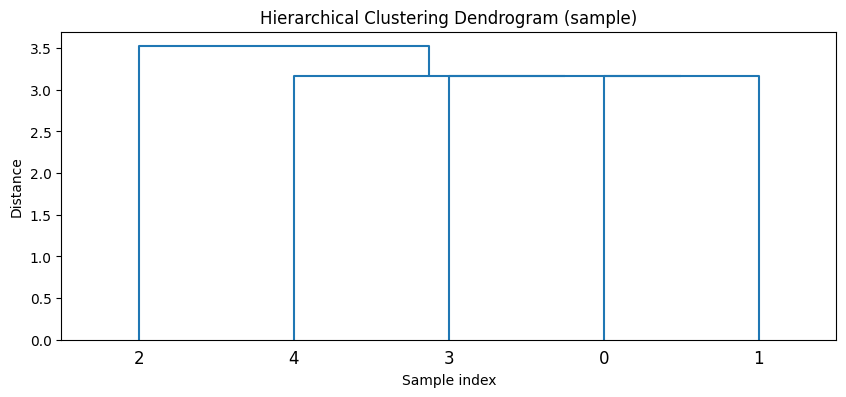

In [29]:
# Apply Agglomerative (Hierarchical) Clustering
agglo = AgglomerativeClustering(n_clusters=n_clusters)
hier_labels = agglo.fit_predict(encoded_df)
survey_df['Hierarchical_Cluster'] = hier_labels

print('Hierarchical cluster sizes:')
print(pd.Series(hier_labels).value_counts())
display(
	survey_df.groupby('Hierarchical_Cluster')[mcq_columns].agg(
		lambda x: x.value_counts().index[0] if not x.value_counts().empty else np.nan
	)
)

# Optional: Plot dendrogram for a sample
plt.figure(figsize=(10, 4))
Z = linkage(encoded_df.sample(min(50, len(encoded_df))), method='ward')
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (sample)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

## 9. Visualize Clusters Using PCA
We will use PCA to reduce dimensionality and visualize clusters in 2D.

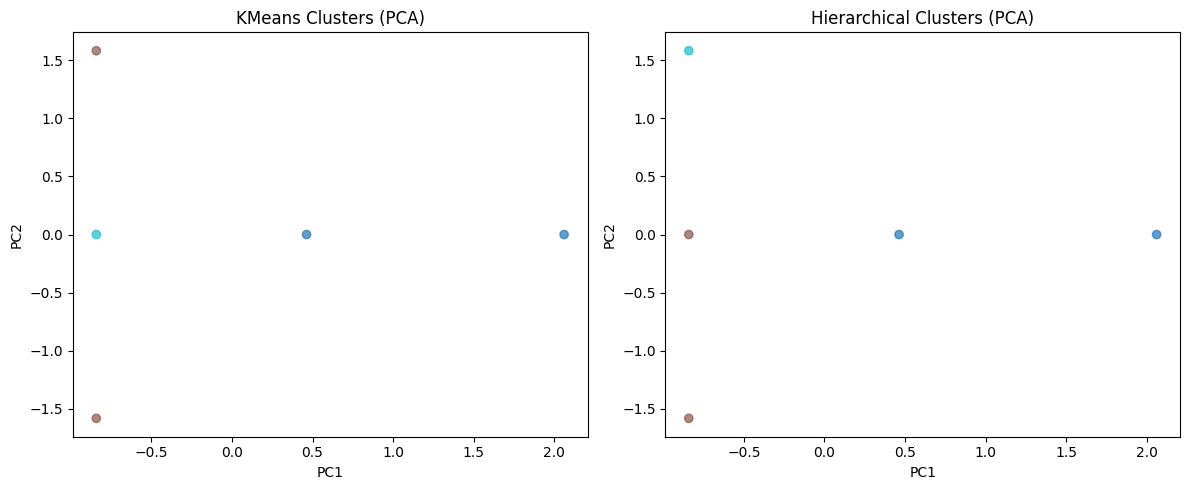

In [30]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(encoded_df)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='tab10', alpha=0.7)
plt.title('KMeans Clusters (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1, 2, 2)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=hier_labels, cmap='tab10', alpha=0.7)
plt.title('Hierarchical Clusters (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.tight_layout()
plt.show()

## 10. Analyze and Interpret Cluster Insights
We will interpret the clusters to identify which groups of students value 'hands-on exercises' vs 'theory', and summarize the findings.

In [31]:
# Analyze and interpret cluster insights
# Replace 'Preference' with the actual column name for hands-on vs theory if available
preference_col = None
for col in mcq_columns:
    if 'hand' in col.lower() or 'theory' in col.lower() or 'practical' in col.lower():
        preference_col = col
        break

if preference_col:
    print(f'Preference column detected: {preference_col}')
    print('\nKMeans Clusters:')
    display(survey_df.groupby('KMeans_Cluster')[preference_col].value_counts(normalize=True).unstack().fillna(0).style.format('{:.1%}'))
    print('\nHierarchical Clusters:')
    display(survey_df.groupby('Hierarchical_Cluster')[preference_col].value_counts(normalize=True).unstack().fillna(0).style.format('{:.1%}'))
else:
    print('No clear preference column found. Please update the code with the correct column name.')

No clear preference column found. Please update the code with the correct column name.
